# Групповая статистика

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Загрузим файл, который мы сохранили при подготовке набора данных.

In [2]:
D = pd.read_csv('rtgotov.csv')
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       48 non-null     float64
 1   v       45 non-null     float64
 2   isi     47 non-null     float64
 3   mod     48 non-null     object 
 4   g       48 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 2.0+ KB


Из информации о наборе данных видно, что в нём есть 4 числовых колонки и одна нечисловая.

Для получения базовой статистики по числовым колонкам удобно использовать метод `describe()`

In [3]:
D.describe()

,t,v,isi,g
count,48.000000,45.000000,47.000000,48.000000
mean,137.359292,0.394822,4.860957,4.916667
std,69.842828,0.085013,2.559978,2.541848
min,9.585000,0.282000,1.671000,2.000000
25%,85.204000,0.338000,2.268500,2.000000
50%,122.865500,0.385000,4.508000,4.000000
75%,204.571000,0.431000,6.917000,8.000000
max,238.050000,0.698000,10.507000,8.000000


Зависимая переменная в колонке 'v' - время реакции, с. 
Значения зависимой переменной мы хотим сгруппировать по признакам модальность (`mod`) и группа (`g`).

In [4]:
D.groupby(by=['mod','g'])['v'].mean()

mod  g
a    2    0.392000
     4    0.456125
     8    0.464143
v    2    0.355143
     4    0.313857
     8    0.382444
Name: v, dtype: float64

В полученной серии сдвоенный индекс в соответствии с нашими группирующими признаками.

Мы можем такой группировочный объект сохранить в переменную, из которой можем получить различные статистические показатели.

In [5]:
g = D.groupby(by=['mod','g'])['v']
g

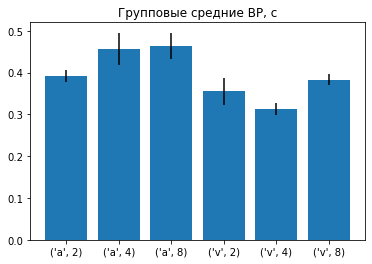

In [6]:
xx = arange(len(g))
yy = g.mean()
bar(xx, yy)
errorbar(xx, yy, yerr=g.sem(), color='k', ls='')
xticks(xx, g.groups.keys())
title('Групповые средние ВР, с');

В данному случае мы отобразили групповые средние `.mean()` и ошибку средних `.sem()` в виде усов.
Подписи к рисунку взяты из названий получившихся групп.

Фактически группировщик задает списки принадлежности исходных данных к найденным группам по их индексам.

In [7]:
g.groups

{('a', 2): [41, 42, 43, 44, 45, 46, 47], ('a', 4): [33, 34, 35, 36, 37, 38, 39, 40], ('a', 8): [24, 25, 26, 27, 28, 29, 30, 31, 32], ('v', 2): [17, 18, 19, 20, 21, 22, 23], ('v', 4): [9, 10, 11, 12, 13, 14, 15, 16], ('v', 8): [0, 1, 2, 3, 4, 5, 6, 7, 8]}

Часто при группировке по двум и более факторам удобно получить итоговые значения на пересечениях всех значений факторов. 
(В терминологии Excel это называется сводная таблица).

In [8]:
P = D.pivot_table(index='mod',columns='g', values='v')
P

g,2,4,8
mod,,,
a,0.392000,0.456125,0.464143
v,0.355143,0.313857,0.382444


По-умолчанию, в сводной таблице считается среднее, но можно задать и другую агрегирующую функцию.

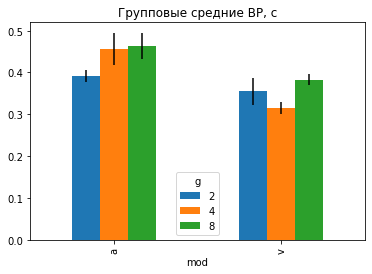

In [9]:
# с параметром aggfunc='sem' вычисляем такую же таблицу с ошибками среднего
E = D.pivot_table(index='mod',columns='g', values='v', aggfunc='sem')
P.plot(kind='bar', yerr=E, title='Групповые средние ВР, с');

Альтернативный способ взглянуть на эти данные - транспонировать сводную таблицу.

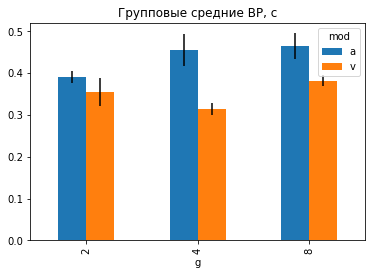

In [10]:
P.T.plot(kind='bar', yerr=E.T, title='Групповые средние ВР, с');

В подписях и легендах к рисункам в пакете `pandas` автоматически отображаются названия группирующих факторов. Это удобно и наглядно при предварительном анализе.

Для окончательных рисунков можно задать свои подписи с соответствующими параметрами. Или, наоборот, можно задать русские названия факторов и их значений.